# Random Forest

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>
  - **5.2** [**Post-Profiling Report**](#Section52)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
  - **8.1** [**Base Model Development & Evaluation**](#Section81)<br>
  - **8.2** [**Hyperparameter Tuning**](#Section82)<br>
  - **8.3** [**Tuned Model Development & Evaluation**](#Section83)<br>

**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- Random forest consists of a **large number** of **individual decision trees** that operate as an ensemble.

- **Each individual tree** in the random forest **spits out a class prediction** and the **class** with the **most votes** becomes our model’s **prediction**.

- The fundamental concept behind random forest is  — **the wisdom of crowds**.

-  In data science speak, the reason that the random forest model works so well is:

### **<center>*A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.*</center>**

<center><img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width=50%></center>

- **Uncorrelated models** can produce ensemble predictions that are **more accurate** than any of the **individual** predictions.

- The reason for this wonderful effect is that the **trees protect each other** from their **individual errors**.

- While **some** trees may be **wrong**, **many** other trees will be **right**, so as a **group** the trees are able to move in the **correct direction**.


---
<a name = Section2></a>
# **2. Problem Statement**
---

- A university has their **MBA placement period** coming up.

- Even though having a good track record of placements, the previous academic year had an **abberant placement record**.

- They don't want to observe a similar scenario this year and **want to predict** the situation of this year's placements.

<center><img src="https://institute.careerguide.com/wp-content/uploads/2020/09/mdm_robot.gif" width=50%></center>

- They have hired a data scientist to carry out this task. Let's say the data scientist is you.

- You have been provided with a **historical data** of **previous year's students** who were a part of placements.

- Your task to provide an **analysis on factors** affecting the placements and **develop a model** to predict if a student will be placed or not.


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
# !pip install -q datascience                                         # Package that is required by pandas profiling
# !pip install -q pandas-profiling                                    # Library to generate basic statistics about data
# !pip install -q yellowbrick                                         # Toolbox for Measuring Machine Performance

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
# !pip install -q --upgrade pandas-profiling
# !pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data into train and test datasets
from sklearn.preprocessing import StandardScaler                    # Importing Standard Scaler library from preprocessing.
from sklearn.ensemble import RandomForestClassifier                 # To instantiate a Logistic Regression Model
from sklearn.metrics import accuracy_score                          # To calculate the accuracy of a classifier
from sklearn.metrics import precision_score                         # To calculate the precision of a classifier
from sklearn.metrics import recall_score                            # To calculate the recall of a classifier
from sklearn.metrics import f1_score                                # To calculate the f1-score of a classifier
from sklearn.model_selection import GridSearchCV                    # To tune the model
from sklearn.model_selection import cross_validate                  # To cross-validate the model
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This data set consists of **Placement** data of students in a campus.

- It includes **secondary** and **higher secondary** school **percentage** and **specialization**.

- It also includes **degree specialization**, **type** and **work experience** and **salary offerd** to the placed students.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 215 | 15 | 20 KB|

</br>

| Id | Features | Description |
| :-- | :-- | :-- |
| 01 | **sl_no** | Serial Number |
| 02 | **gender** | Gender |
| 03 | **ssc_p** | SSC Percentage |
| 04 | **ssc_b** | SSC Board (Central or Others |
| 05 | **hsc_p** | HSC Percentage |
| 06 | **hsc_s** | HSC Stream |
| 07 | **hsc_b** | HSC Board (Central or Others |
| 08 | **degree_p** | Undergraduate degree Percentage |
| 09 | **degree_t** | Undergraduate Stream |
| 10 |**workex**| Previous Work Experience (Yes or No) |
| 11 |**etest_p**| Employability Test Percentage |
| 12 |**specialisation**| MBA Specialisation |
| 13 |**mba_p**| MBA Percentage |
| 14 |**status**| Status (Placed or Not Placed) |
| 15 |**salary**| Salary (if Placed) |

In [ ]:
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/Placement_Data_Full_Class.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (215, 15)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.00
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.00
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.00
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.00


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.00,215.00,215.00,215.00,215.00,215.00,148.00
mean,108.00,67.30,66.33,66.37,72.10,62.28,288655.41
std,62.21,10.83,10.90,7.36,13.28,5.83,93457.45
min,1.00,40.89,37.00,50.00,50.00,51.21,200000.00
25%,54.50,60.60,60.90,61.00,60.00,57.95,240000.00
50%,108.00,67.00,65.00,66.00,71.00,62.00,265000.00
75%,161.50,75.70,73.00,72.00,83.50,66.25,300000.00
max,215.00,89.40,97.70,91.00,98.00,77.89,940000.00


**Observations:**

- **SSC Percentage** ranges from **40.89% upto 89.40%** averaging at **67.30%**.

- **HSC Percentage** ranges from **37.00% upto 97.70%** averaging at **66.33%**.

- **Degree Precentage** Percentage ranges from **50.00% upto 91.00%** averaging at **66.37%**.

- **Employability Test Percentage** ranges from **50.00% upto 98.00%** averaging at **72.10%**.

- **MBA Percentage** ranges from **51.21% upto 77.89%** averaging at **62.28%**.

- **Salary** ranges from **₹200000/- upto ₹940000/-** averaging at **₹288655/-**.

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**Observations:**

- There are **215 rows** with **15 features**.

- There are **8 object** datatype features and **6** **float64** datatypes and **one int64** datatype which is `sl_no`.

- We have to convert some of the features into **appropriate** data types.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

**Observations:**

- Dataset has **no duplicate rows**.

- **148 students** have been **placed** according to the dataset.

- There are **67 missing values (31.2%)** in the **salary** feature which indicates the students who were not placed.

- **Precentage scores** of students are **correlated** to each other indicating a student's consistent performance over the years.

**Performing Operations**


---
**<h4>Question 1:** Create a function that replaces the null values from the salary feature with the mean value of the feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use `.fillna(data['salary'].mean())` to remove null values from the feature.

</details>

In [ ]:
def remove_null(data=None):
  data['salary'] = data['salary'].fillna(data['salary'].mean())

In [ ]:
remove_null(data=data)
data.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<a name = Section52></a>
### **5.2 Post Profiling Report**


In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

**Observations:**

- There are **no missing cells** in the dataset.

- **Status** is **highly correlated** to all **academic scores**.

- **Salary** is **correlated** with **status**.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---


---
**<h4>Question 2:** Create a function that checks for the distribution of placement status in contrast to gender of the students </h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inch figure

- You can use `sns.counplot` method on gender feature and keep status as hue.

- Add cosmetics like grid and title.

- Keep the tick size as 12, label size as 14 and title size as 16.

</details>

In [ ]:
def gender_status(data=None):

  # Create a 15x7 inch figure
  fig = plt.figure(figsize=(15, 7))

  # Create a countplot for gender and keep status as hue
  sns.countplot(data=data, y='gender', hue='status', palette='hls')

  # Add cosmetics
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel(ylabel='Gender', fontsize=14)
  plt.xlabel(xlabel='Count', fontsize=14)
  plt.title(label='Gender in relation to Placement status', fontsize=16)
  plt.grid(b=True)

  # Display the plot
  plt.show()

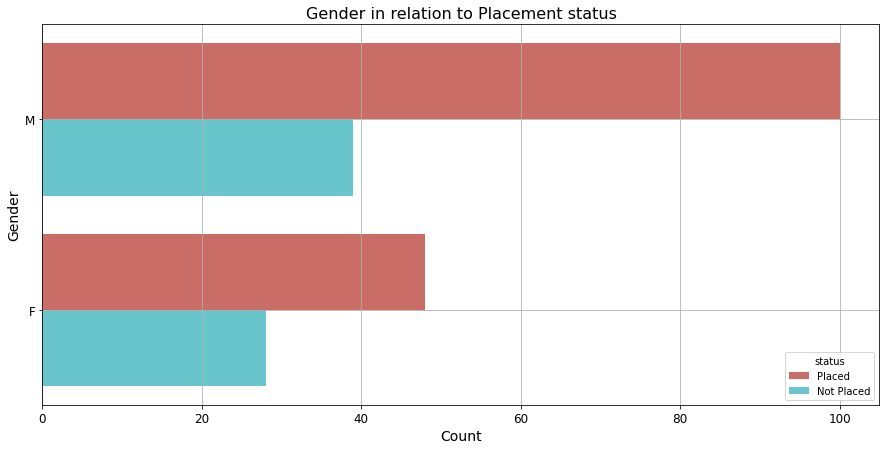

In [ ]:
gender_status(data=data)

**Observations:**

- **Majority** of students are **male**.

- **Count-wise**, **males** are **placed the most** corresponding to their high proportion.

- But proportion-wise, the **rate of females** being placed is **higher** than the males.


---
**<h4>Question 3:** Create a function that determines if workex has any influence on placement salary of students. </h4>

---

<details>

**<summary>Hint:</summary>**

- You can use `sns.catplot` method on salary and workex features.

- Add cosmetics like grid and title.

- Keep the tick size as 12, label size as 14 and title size as 16.

</details>

In [ ]:
def salary_workex(data=None):

  # Create a catplot for salary and workex
  sns.catplot(data=data, y='salary', x='workex', height=7, aspect=1.25)

  # Add cosmetics
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel(ylabel='Salary', fontsize=14)
  plt.xlabel(xlabel='Workex', fontsize=14)
  plt.title(label='Workex influence on salary', fontsize=16)
  plt.grid(b=True)

  # Display the plot
  plt.show()

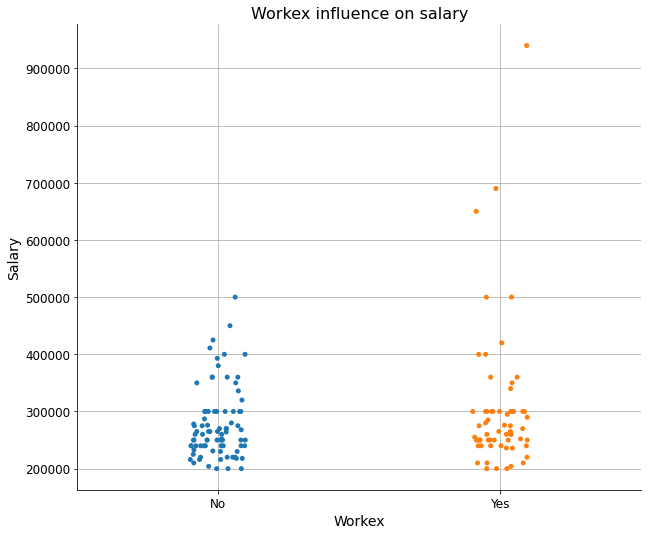

In [ ]:
salary_workex(data=data[data['status']=='Placed'])

**Observations:**

- Almost **equal number** of students are placed **irrespective** of their work **experience**.

- But **work experience** plays **some role** for the salary of placed students.

- We can see that some students who **have previous work experience** have grabbed **better package**s as compared to students without previous experience.


---
**<h4>Question 4:** Create a function that checks the distribution of the percentages of `ssc`, `hsc`, `etest`, and `mba` features. </h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 20x10 inch figure with 4 subplots.

- You can use `sns.kdeplot` method on the mentioned features.

- Add cosmetics like grid and title.

- Keep the label size as 14 and title size as 16.

</details>

In [ ]:
def student_percent(data=None):

  # Create a 20x10 inch figure
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

  # Create a kdeplot for all the mentioned features
  sns.kdeplot(data=data, x='ssc_p', ax=ax[0, 0])
  sns.kdeplot(data=data, x='hsc_p', ax=ax[0, 1], c='red')
  sns.kdeplot(data=data, x='etest_p', ax=ax[1, 0], c='green')
  sns.kdeplot(data=data, x='mba_p', ax=ax[1, 1], c='orange')

  # Add cosmetics
  ax[0 ,0].set_title(label='SSC Percentage', fontsize=16)
  ax[0 ,0].set_xlabel(xlabel='Percentage', fontsize=14)
  ax[0 ,0].set_ylabel(ylabel='Density', fontsize=14)
  ax[0, 0].grid(b=True)

  ax[0 ,1].set_title(label='HSC Percentage', fontsize=16)
  ax[0 ,1].set_xlabel(xlabel='Percentage', fontsize=14)
  ax[0 ,1].set_ylabel(ylabel='Density', fontsize=14)
  ax[0, 1].grid(b=True)

  ax[1 ,0].set_title(label='Employability test Percentage', fontsize=16)
  ax[1 ,0].set_xlabel(xlabel='Percentage', fontsize=14)
  ax[1 ,0].set_ylabel(ylabel='Density', fontsize=14)
  ax[1, 0].grid(b=True)

  ax[1 ,1].set_title(label='MBA Percentage', fontsize=16)
  ax[1 ,1].set_xlabel(xlabel='Percentage', fontsize=14)
  ax[1 ,1].set_ylabel(ylabel='Density', fontsize=14)
  ax[1, 1].grid(b=True)

  plt.tight_layout()

  # Display the plot
  plt.show()

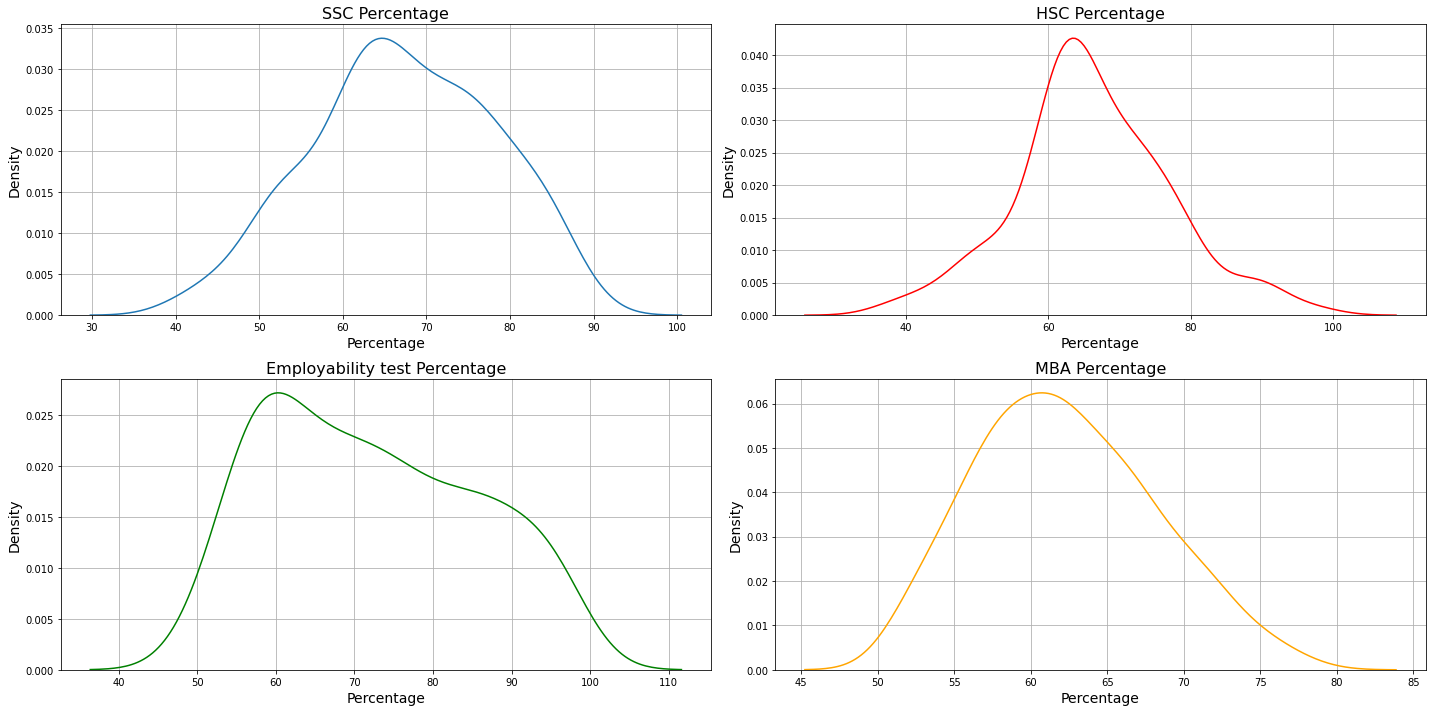

In [ ]:
student_percent(data=data)

**Observations:**

- All the plots are almost **normally distributed** with a slight **skewness** in **e_test** feature.


---
**<h4>Question 5:** Create a function that checks the relationship between the specialisation and placement status of students. </h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inch figure

- You can use `sns.countplot` method on specialisation and keep status as hue.

- Add cosmetics like grid and title.

- Keep the tick size as 12, label size as 14 and title size as 16.

</details>

In [ ]:
def specialisation_status(data=None):

  # Create a 15x7 inch figure
  fig = plt.figure(figsize=(15, 7))

  # Create a countplot for specialisation and keep status as hue
  sns.countplot(data=data, y='specialisation', hue='status', palette='rocket')

  # Add cosmetics
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel(ylabel='Specialisation', fontsize=14)
  plt.xlabel(xlabel='Count', fontsize=14)
  plt.title(label='Specialisation in relation to Placement status', fontsize=16)
  plt.grid(b=True)

  # Display the plot
  plt.show()

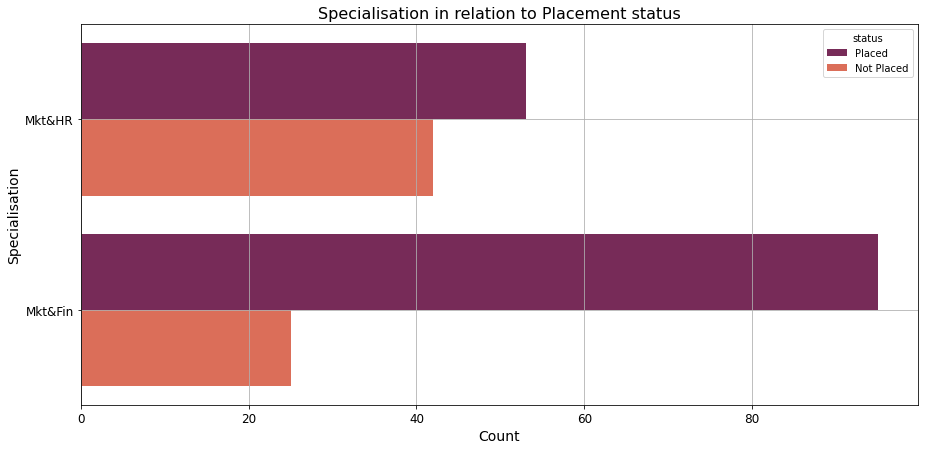

In [ ]:
specialisation_status(data=data)

**Observations:**

- Number of students from **Marketing and Finance** are placed as **twice** as number of students from **Marketing and HR**.

- **Majority** of students are from **Marketing and Finance** as well.

- But the **proportion** of placed students is still **low** in **Marketing and HR** as compared to Marketing and Finance.


---
**<h4>Question 6:** Create a function that checks the proportion of undergraduate fields of the students. </h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inch figure

- You can use `plt.pie` method on degree_t feature.

- Add cosmetics like title.

- Keep the tick size as 12, label size as 14 and title size as 16.

</details>

In [ ]:
def ug_fields(data=None):
  # Create a 15x7 inch figure
  fig = plt.figure(figsize=(15, 7))

  # Plot a pieplot of the combined dataframe
  plt.pie(data['degree_t'].value_counts(),
          autopct='%.1f%%',
          radius=1.1,
          textprops={'fontsize': 14},
          wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'width': 0.5},
          pctdistance=1.1,
          explode=[0.05, 0.05, 0.05],
          labels=data['degree_t'].unique(),
          labeldistance=1.25)

  # Add cosmetics
  plt.suptitle(t='Technical Fields in undergraduate term', fontsize=18, y=1.02)
  plt.tight_layout()

  # Display the output
  plt.show()

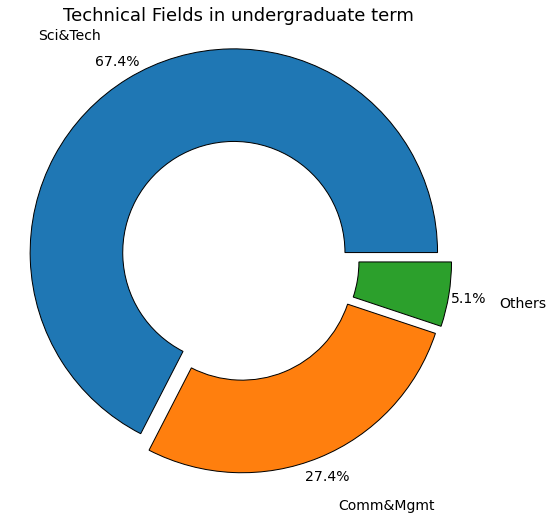

In [ ]:
ug_fields(data=data)

**Observations:**

- **Science and Tech** undergraduates **dominate** the MBA placements followed by **Commerce and Management**.


---
**<h4>Question 7:** Create a function that checks if mba percentage has any relation with the salary of the placed students. </h4>

---

<details>

**<summary>Hint:</summary>**

- Create a 15x7 inch figure

- You can use `sns.regplot` method on salary and mba_p features.

- Add cosmetics like title.

- Keep the tick size as 12, label size as 14 and title size as 16.

</details>

In [ ]:
def mba_salary(data=None):

  # Create a 15x7 inch figure
  fig = plt.figure(figsize=(15, 7))

  # Create a countplot for specialisation and keep status as hue
  sns.regplot(data=data, x='mba_p', y='salary', color='green')

  # Add cosmetics
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel(ylabel='Salary', fontsize=14)
  plt.xlabel(xlabel='MBA Percentage', fontsize=14)
  plt.title(label='Salary on basis of MBA Percentage', fontsize=16)
  plt.grid(b=True)

  # Display the plot
  plt.show()

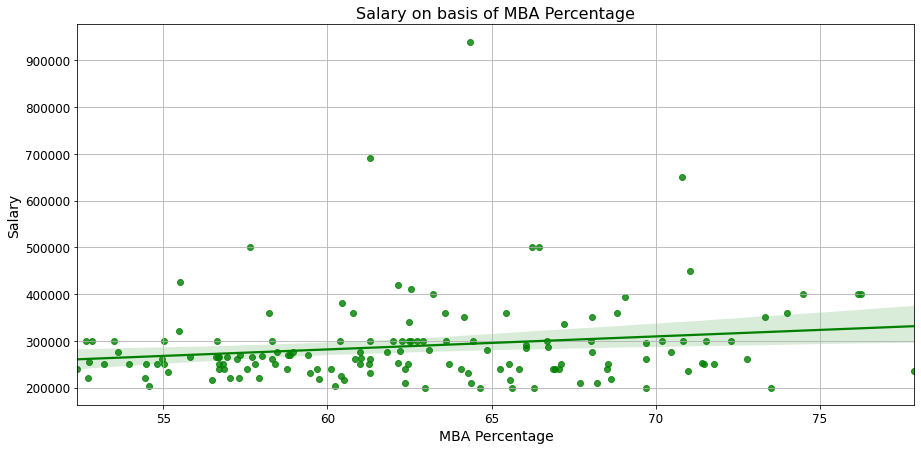

In [ ]:
mba_salary(data=data[data['status']=='Placed'])

**Observations:**

- We can see that there is **no relation** between salary and mba percentage of a placed student.

- Most of the students have **similar salary ranges** irrespective of their MBA Percentage.

<a name = Section7></a>

---
# **7. Data Post-Processing**
---

<a name = Section71></a>
### **7.1 Feature Encoding**

- In this section, we will encode the important categorical features using dummification.


---
**<h4>Question 8:** Create a function that performs the following operations:</h4>

---

- Dummification over the given features:
  - `['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']`

- Maps 1 for 'Placed' value and 0 for 'Not Placed' in the `'status'` feature.

<details>

**<summary>Hint:</summary>**

- You can use `pd.get_dummies()` to dummify the features.

- You can use `.map()` method to convert the values of the status feature.

</details>

In [ ]:
def encode_features(data=None):
  # Perform Dummification over the features and drop those features
  dummified = data.join(pd.get_dummies(data[['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']], drop_first=True))
  dummified.drop(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation'], axis=1, inplace=True)

  # Map the status feature
  dummified['status'] = dummified['status'].map(lambda x: 1 if x=='Placed' else 0)

  return dummified

In [ ]:
dummified = encode_features(data=data)

<a name = Section72></a>
### **7.2 Feature Extraction**

- In this section, we will extract the important features and seperate the independent and dependent variables.

---
**<h4>Question 9:** Create a function that creates two dataframes for dependent and independent features.</h4>

---

<details>

**<summary>Hint:</summary>**

- Create input dataframe X by dropping only "nephritis" feature from axis 1.

- Create target series by using "nephritis" as value.

</details>


In [ ]:
def seperate_Xy(data=None):
  X = data.drop(labels=['sl_no', 'salary', 'status'], axis=1)
  y = data['status']
  return X, y

In [ ]:
X, y = seperate_Xy(data=dummified)

<a name = Section73></a>
### **7.3 Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

---
**<h4>Question 10:** Create a function that splits the data into train and test datasets while keeping random state as 42.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use `train_test_split()` to split the dataset.

- Use `test_size` of **0.30**

- Use `random_state` equal to **42**.

- **Stratify** the target variable.

</details>

In [ ]:
def Xy_splitter(X=None, y=None):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

  print('Training Data Shape:', X_train.shape, y_train.shape)
  print('Testing Data Shape:', X_test.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = Xy_splitter(X=X, y=y)

Training Data Shape: (172, 14) (172,)
Testing Data Shape: (43, 14) (43,)


<a name = Section74></a>
### **7.4 Data Preparation**

- In this section, we will perform scaling over the independent dataframe using a StandardScaler.

---
**<h4>Question 11:** Create a function that splits the data into train and test datasets while keeping random state as 42.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use `StandardScaler()` method for the scaling of features.

- Instantiate a `StandardScaler()`.

- Apply `.fit_transform()` method over the independent training feature (X_train).

- Use `.transform()` on X_test to transform the X_test as well

- Create new dataframes using the output of `.fit_transform()` and `.transform()` and the columns of the input dataframe.


</details>

In [ ]:
def scale_features(X_train=None, X_test=None):
  sc = StandardScaler()
  scaled_X_train = sc.fit_transform(X_train)
  scaled_X_test = sc.transform(X_test)
  X_train_frame = pd.DataFrame(data=scaled_X_train, columns=X_train.columns)
  X_test_frame = pd.DataFrame(data=scaled_X_test, columns=X_test.columns)
  return X_train_frame, X_test_frame

In [ ]:
scaled_X_train, scaled_X_test = scale_features(X_train=X_train, X_test=X_test)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will develop a random forest classification model, tune it and select the model with best parameterrs.

<a name = Section81></a>

### **8.1 Base Model Development & Evaluation**


- In this section we will develop a simple random forest classification model and evaluate it based on accuracy, precision and recall scores.

---
**<h4>Question 12:** Create a function that instantiates a RandomForestClassifier, fits the model on train set and evaluates it on test set using appropriate metrics.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a Random Forest classifier model using RandomForestClassifier().

- Keep `class_weight='balanced'`.

- `Fit` the model on training set.

- `Predict` the values on the train set and the test set.

- Evaluate the model using the `accuracy_score` on the train and test set.

- Calculate Precision and Recall of the model.

</details>

In [ ]:
def train_n_eval():

  # Instantiating a random forest classifier
  clf = RandomForestClassifier(class_weight='balanced')

  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(scaled_X_train, y_train)

  # Make predictions using train data
  y_pred_train = clf.predict(scaled_X_train)

  # Make predictions using test data
  y_pred = clf.predict(scaled_X_test)

  # Calculate train accuracy of the model
  clf_train_acc = accuracy_score(y_train, y_pred_train)

  # Calculate test accuracy of the model
  clf_acc = accuracy_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metrics for', model_name, ':')
  print('[Accuracy-Score Train]:', clf_train_acc)
  print('[Accuracy-Score Test]:', clf_acc)
  print('[Recall:]', recall_score(y_pred,y_test))
  print('[Precision:]', precision_score(y_pred,y_test))

  scores = pd.DataFrame([{'Model Name':'Random Forest Classifier (Base)',
                          'Train Accuracy':clf_train_acc,
                          'Test Accuracy':clf_acc,
                          'Recall Score':recall_score(y_pred,y_test),
                          'Precision Score':precision_score(y_pred,y_test)}])

  return scores

In [ ]:
scores = train_n_eval()
scores.head()

Performance Metrics for RandomForestClassifier :
[Accuracy-Score Train]: 1.0
[Accuracy-Score Test]: 0.8604651162790697
[Recall:] 0.8529411764705882
[Precision:] 0.9666666666666667


,Model Name,Train Accuracy,Test Accuracy,Recall Score,Precision Score
0,Random Forest Classifier (Base),1.00,0.86,0.85,0.97


**Observations:**

- We have obtained a test **accuracy** score of **0.86**.

- It is **not the best** achieved score and can be further **improved** upon by tuning the model.

<a name = Section82></a>

### **8.2 Hyperparameter Tuning**


- In this section we will tune the model and select the best model available for further model development.

---
**<h4>Question 13:** Create a function that performs tuning on a Random Forest using GridSearchCV and returns the best model.</h4>

---

<details>

**<summary>Hint:</summary>**

- Instantiate a Random Forest classifier model using RandomForestClassifier().

- Keep `class_weight='balanced'` and `random_state=42`.

- Use the following parameter grid:

`param_grid_rfc = { 'n_estimators': [100, 500, 1000],
                  'max_features': ['auto', 'sqrt'],
                  'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
                  'criterion' :['gini', 'entropy']}`


- Instantiate a GridSearchCV object with cv=5.

- `Fit` the model on training set.

- Evaluate the model using the `accuracy_score` on the train and test set.

</details>

In [ ]:
def tune_model():

  # Creating a parameter grid for Random Forest
  param_grid_rfc = { 'n_estimators': [100, 500, 1000],
                    'max_features': ['auto', 'sqrt'],
                    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
                    'criterion' :['gini', 'entropy']}

  rfc = RandomForestClassifier(random_state=42, class_weight='balanced')

  clf = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv= 5)
  clf.fit(scaled_X_train, y_train)

  print("[Hyperparameters]:", clf.best_params_)
  print("[Train Score]:", clf.best_score_)
  print("[Test Score]:", accuracy_score(y_test, clf.predict(scaled_X_test)))

  return clf.best_estimator_

In [ ]:
best_clf = tune_model()

[Hyperparameters]: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 500}
[Train Score]: 0.8433613445378152
[Test Score]: 0.8837209302325582


<a name = Section83></a>

### **8.3 Tuned Model Development & Evaluation**


- In this section we will fit a tuned random forest classifier and evaluate it based on accuracy, precision and recall scores.

---
**<h4>Question 14:** Create a function that fits the best obtained model on train set and evaluates it on test set using appropriate metrics.</h4>

---

<details>

**<summary>Hint:</summary>**

- `Fit` the model on training set.

- `Predict` the values on the train set and the test set.

- Evaluate the model using the `accuracy_score` on the train and test set.

- Calculate Precision and Recall of the model.

</details>

In [ ]:
def train_n_eval_best(rf=None, scores=None):

  # Fit the model on train set
  rf.fit(scaled_X_train, y_train)

  # Make predictions on train data
  y_pred_train = rf.predict(scaled_X_train)

  # Make predictions on test data
  y_pred = rf.predict(scaled_X_test)

  # Calculate train accuracy of the model
  rf_train_acc = accuracy_score(y_train, y_pred_train)

  # Calculate test accuracy of the model
  rf_acc = accuracy_score(y_test, y_pred)

  # Display the accuracy of the model
  print('Performance Metrics for best Random Forest Classifier:')
  print('[Accuracy-Score Train]:', rf_train_acc)
  print('[Accuracy-Score Test]:', rf_acc)
  print('[Recall:]', recall_score(y_pred, y_test))
  print('[Precision:]', precision_score(y_pred, y_test))

  score = pd.DataFrame([{'Model Name':'Random Forest Classifier (Tuned)',
                          'Train Accuracy':rf_train_acc,
                          'Test Accuracy':rf_acc,
                          'Recall Score':recall_score(y_pred, y_test),
                          'Precision Score':precision_score(y_pred, y_test)}])

  scores = scores.append(score, ignore_index=True)

  return scores

In [ ]:
scores = train_n_eval_best(rf = best_clf, scores = scores)
scores

Performance Metrics for best Random Forest Classifier:
[Accuracy-Score Train]: 0.9069767441860465
[Accuracy-Score Test]: 0.8837209302325582
[Recall:] 0.9032258064516129
[Precision:] 0.9333333333333333


,Model Name,Train Accuracy,Test Accuracy,Recall Score,Precision Score
0,Random Forest Classifier (Base),1.00,0.86,0.85,0.97
1,Random Forest Classifier (Tuned),0.91,0.88,0.90,0.93


**Observations:**

- We can see that the new model **fits well** on the train set and gives good scores with test set as well.

- We have seen **improvement** in **recall** score **without** much **compromising** **precision** score.

- We can use this model to predict if a **student** will be **placed or not** based on their past data.

<a name = Section9></a>

---
# **9. Conclusion**
---

- We have observed that **academics** play an **important** role in getting a student **placed**.

- **Salary** of a student is also slightly influenced by **previous work experience**.

- Proportion of **females** getting **placed** is **higher** than males.

- **Finance and Marketing** specialisations have **more chances** of getting placed than **Finance and HR**.

- The developed model can be used for **testing on real-world data** to determine the placement scenario of this year's students.